In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bmh_path = '/kaggle/input/shellai-2023-dataset/dataset/Biomass_History.csv'
dm_path = '/kaggle/input/shellai-2023-dataset/dataset/Distance_Matrix.csv'
ss_path = '/kaggle/input/shellai-2023-dataset/dataset/sample_submission.csv'

# Biomass History

In [5]:
bmh = pd.read_csv(bmh_path)
print(f"Shape of BMH DataFrame is: {bmh.shape}")
bmh.head()

Shape of BMH DataFrame is: (2418, 11)


,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [6]:
bmh.describe()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,1208.500000,22.506537,71.826215,144.401424,150.860247,109.468899,161.886430,157.954024,132.898633,113.089323,159.163367
std,698.160798,1.034936,1.389804,146.506351,142.264612,110.249714,180.337708,139.870466,129.689111,102.092570,158.993069
min,0.000000,20.154560,68.624190,0.000167,0.000433,0.000290,0.000532,0.000155,0.000072,0.000151,0.000191
25%,604.250000,21.685970,70.774060,23.449163,25.576084,22.711070,27.044554,31.514698,22.732275,22.658495,26.064368
50%,1208.500000,22.491970,71.888820,112.298855,126.291077,82.271317,117.662296,136.859337,106.789989,91.721931,120.519817
75%,1812.750000,23.297970,73.003570,207.689327,226.197079,163.512547,222.835739,241.965115,196.102222,177.136295,231.067348
max,2417.000000,24.668180,74.436820,883.691711,771.061646,871.800415,1232.853760,871.800415,771.061646,514.148987,883.691711


In [14]:
# Checking if there are any null values in the dataframe
bmh.any().isnull()

Index        False
Latitude     False
Longitude    False
2010         False
2011         False
2012         False
2013         False
2014         False
2015         False
2016         False
2017         False
dtype: bool

In [28]:
import geopandas as gpd
latitudes = bmh.Latitude.values
longitudes = bmh.Longitude.values

data = pd.DataFrame({'lat':latitudes, 'lon': longitudes})
# display(data)
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))
gdf.crs = "EPSG:4326" 

/tmp/ipykernel_33/652068702.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


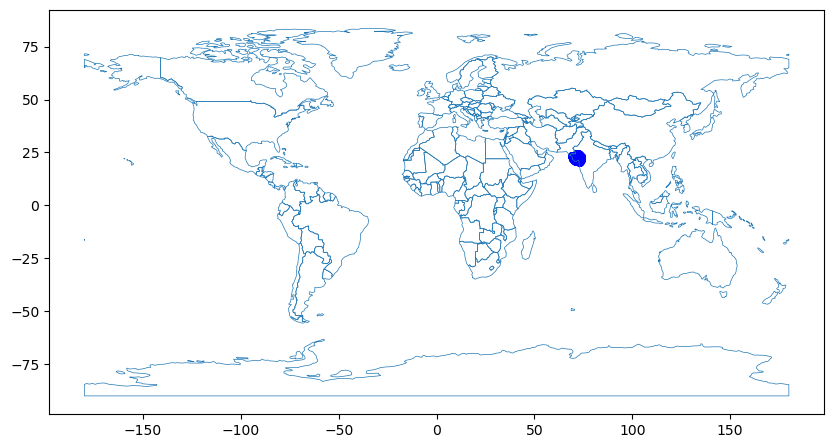

In [30]:
# Create a basic world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map using geopandas
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=0.5)

# Plot the data points on the map
gdf.plot(ax=ax, markersize=50, color='blue', marker='.', label='Data Points')
# Show the plot
plt.show()


# Distance Matrix

In [34]:
dm = pd.read_csv(dm_path)
print(f"Shape of Distance Matrix DatFrame is: {dm.shape}")
dm.head()

Shape of Distance Matrix DatFrame is: (2418, 2419)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280


In [36]:
dm.iloc[:, 1:].describe()

,0,1,2,3,4,5,6,7,8,9,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,...,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,368.031304,365.729249,369.361137,374.317877,364.935760,366.200883,365.522294,360.913470,376.665724,355.772465,...,509.602595,513.239310,522.636875,497.695405,495.976481,493.873872,490.351866,493.042140,500.292465,508.498608
std,142.202810,142.319107,141.790200,144.166507,142.542589,141.911293,139.764351,139.470298,139.911641,139.231802,...,188.618172,188.845803,189.456049,184.746220,184.749850,184.752665,184.683925,186.697289,186.677956,186.703896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,268.331575,266.083875,272.246875,272.766700,265.546175,267.110025,268.890600,264.145300,280.132200,258.901200,...,395.706100,399.459975,409.153500,384.531775,382.814375,380.713075,377.164675,379.138275,386.379975,394.596275
50%,378.698250,376.450600,380.004150,388.647500,379.764200,380.317950,383.447750,378.702400,394.689350,373.458350,...,531.021850,534.775750,544.469300,516.540900,514.823550,512.722250,509.173900,513.110250,520.352000,528.568250
75%,471.071850,468.824175,472.753550,483.028325,473.622025,474.513650,472.969950,468.224575,484.211550,462.980550,...,651.121025,654.874825,664.568425,636.640025,634.922725,632.821400,629.273025,633.209400,640.451050,648.667325
max,705.814600,703.567000,704.169700,704.522500,686.724300,675.017300,662.325700,657.580300,673.567300,652.336300,...,891.998200,895.752100,905.445600,877.517200,875.799900,873.698600,870.150200,874.086600,881.328300,889.544600


In [37]:
dm.any().isnull()

Unnamed: 0    False
0             False
1             False
2             False
3             False
              ...  
2413          False
2414          False
2415          False
2416          False
2417          False
Length: 2419, dtype: bool

## Sample Submission

In [38]:
ss = pd.read_csv(ss_path)
ss.head()

,year,data_type,source_index,destination_index,value
0,20182019,depot_location,1256,NaN,NaN
1,20182019,depot_location,1595,NaN,NaN
2,20182019,depot_location,1271,NaN,NaN
3,20182019,depot_location,2001,NaN,NaN
4,20182019,depot_location,2201,NaN,NaN
